In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [21]:
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [22]:
df = pd.read_csv('../csv/credit_score_clean_extraction.csv')
# use os to store csv file
features = ['Credit_Mix', 'Total_Financial_Obligations', 'Outstanding_Debt', 'Credit_History_Age', 'Interest_Loan_Interaction']
y = custom_encoding(df["Credit_Score"])


In [23]:
def out_liar(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lowerBand = Q1 - 1.5 * IQR
    upperBand = Q3 + 1.5 * IQR
    # number of outlier in column
    count_outliar = column_data[column_data > upperBand].count() + column_data[column_data < lowerBand].count()
    if count_outliar > 0:
        color = '#6CE5E8'
        sns.boxplot(column_data, orient='v', color=color)
        plt.title(column_data.name)
        # show number of outlier
        plt.text(0.8, 0.9, f"outliar:{count_outliar}", fontsize=12, transform=plt.gca().transAxes)
        plt.show()
        if count_outliar > 0:
            column_data = column_data.apply(lambda x: upperBand if x > upperBand else lowerBand if x < lowerBand else x)
            plt.title(column_data.name)
            sns.boxplot(column_data, orient='v', color=color)
            plt.show()
            return column_data
    return column_data

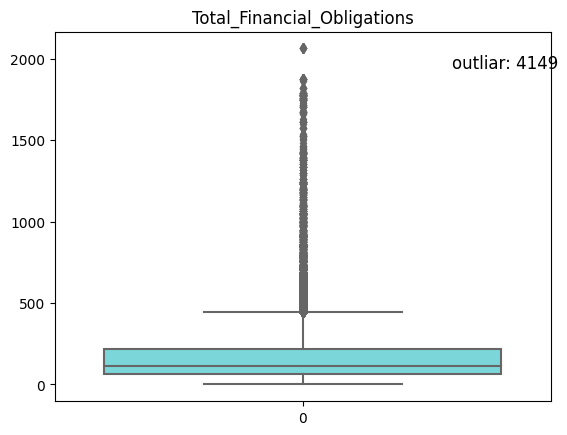

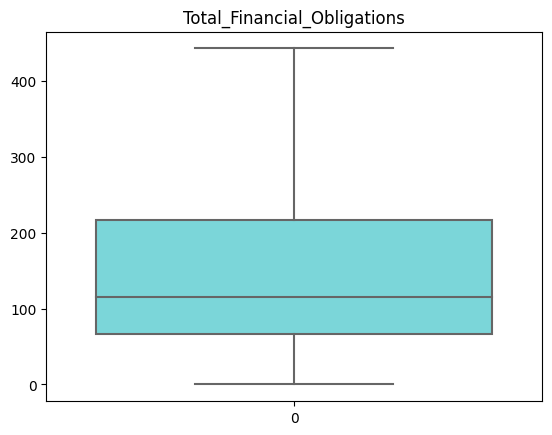

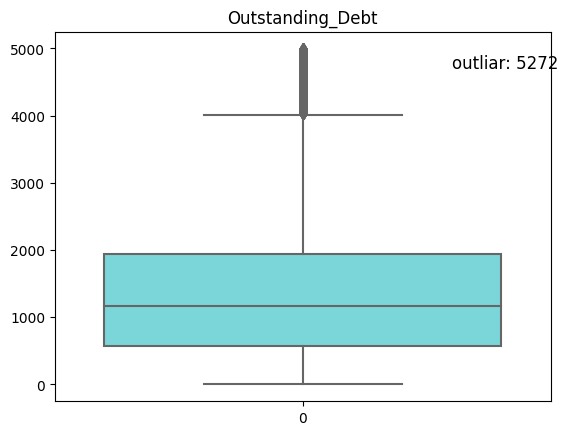

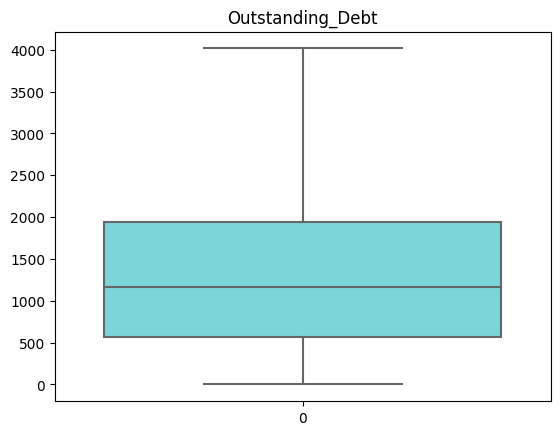

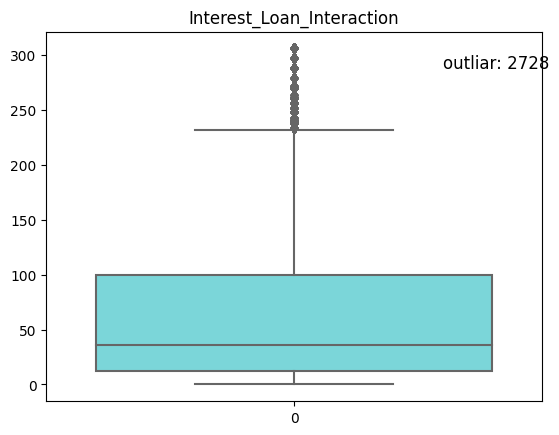

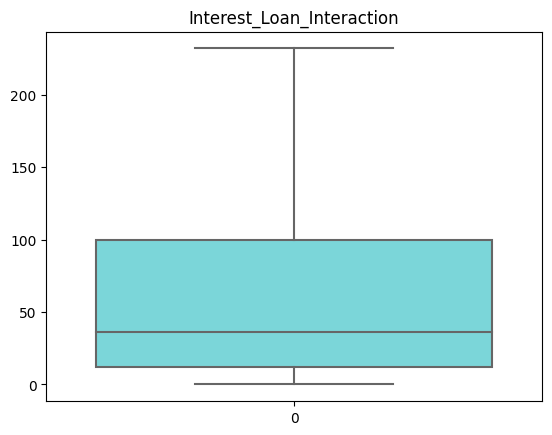

In [24]:
for feature in features:
    df[feature] = out_liar(df[feature])
    


In [26]:
x = df[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [27]:
# save scaled data
scaled_data = pd.DataFrame(scaled_data, columns=features)
scaled_data['Credit_Score'] = y
scaled_data.to_csv('../csv/scaled_data.csv', index=False)
